# Exp_5: The aim is to build your own Image dataset and design a Convoluional Neural Network (CNN) classifier. Train and test the model. Calculate the trainable parameters manually and check with the model. Also calculate the performance metrics by building the confusion matrix. Calculate Accuracy, Precision, recall and F1 score.

In [1]:
# Read the dataset

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor
import os
from PIL import Image

In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128, 224 standard. 256, 512
    transforms.ToTensor(),          # Convert to tensor
])

In [4]:
# Define dataset directories
data_dir = "MY_DATASET_EXP5" #"path/to/your/dataset" Change this to your dataset path
train_dir = f"{data_dir}/train"
test_dir = f"{data_dir}/test"

In [5]:
# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

In [6]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True) #32
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [7]:
# Get class names
class_names = train_dataset.classes
print(f"Class Names: {class_names}")

Class Names: ['cats', 'dogs', 'serval']


In [8]:
# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Display dataset sizes
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of testing images: {len(test_dataset)}")

# Display class-wise distribution
train_class_counts = {train_dataset.classes[i]: 0 for i in range(len(train_dataset.classes))}
test_class_counts = {test_dataset.classes[i]: 0 for i in range(len(test_dataset.classes))}

# Dictionary to store image sizes
train_image_sizes = []
test_image_sizes = []

# Get image sizes and class distributions
for img_path, label in train_dataset.imgs:
    train_class_counts[train_dataset.classes[label]] += 1
    with Image.open(img_path) as img:
        train_image_sizes.append(img.size)  # (width, height)

for img_path, label in test_dataset.imgs:
    test_class_counts[test_dataset.classes[label]] += 1
    with Image.open(img_path) as img:
        test_image_sizes.append(img.size)  # (width, height)

# Unique image sizes in the dataset
unique_train_sizes = set(train_image_sizes)
unique_test_sizes = set(test_image_sizes)

print("\nClass-wise distribution (Train):")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nClass-wise distribution (Test):")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nUnique image sizes in Training Set:")
for size in unique_train_sizes:
    print(f"Size: {size[0]}x{size[1]} (Width x Height)")

print("\nUnique image sizes in Testing Set:")
for size in unique_test_sizes:
    print(f"Size: {size[0]}x{size[1]} (Width x Height)")


Number of training images: 31
Number of testing images: 30

Class-wise distribution (Train):
cats: 10 images
dogs: 10 images
serval: 11 images

Class-wise distribution (Test):
cats: 10 images
dogs: 10 images
serval: 10 images

Unique image sizes in Training Set:
Size: 284x177 (Width x Height)
Size: 225x225 (Width x Height)
Size: 265x190 (Width x Height)
Size: 534x360 (Width x Height)
Size: 275x183 (Width x Height)
Size: 276x183 (Width x Height)
Size: 288x175 (Width x Height)
Size: 270x186 (Width x Height)
Size: 277x182 (Width x Height)
Size: 300x168 (Width x Height)
Size: 259x194 (Width x Height)

Unique image sizes in Testing Set:
Size: 244x207 (Width x Height)
Size: 265x190 (Width x Height)
Size: 278x181 (Width x Height)
Size: 269x187 (Width x Height)
Size: 200x252 (Width x Height)
Size: 273x184 (Width x Height)
Size: 301x167 (Width x Height)
Size: 289x174 (Width x Height)
Size: 281x179 (Width x Height)
Size: 183x275 (Width x Height)
Size: 300x168 (Width x Height)
Size: 259x194 (Widt

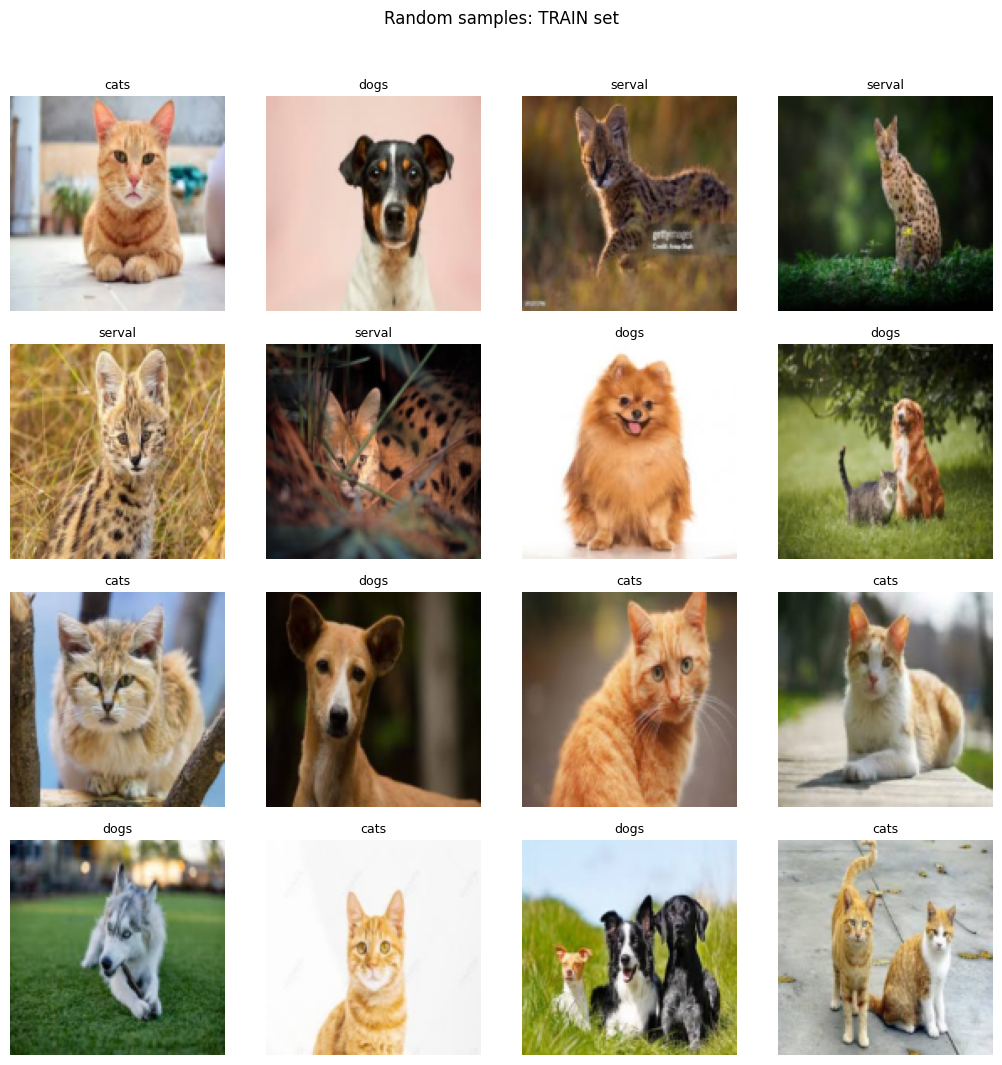

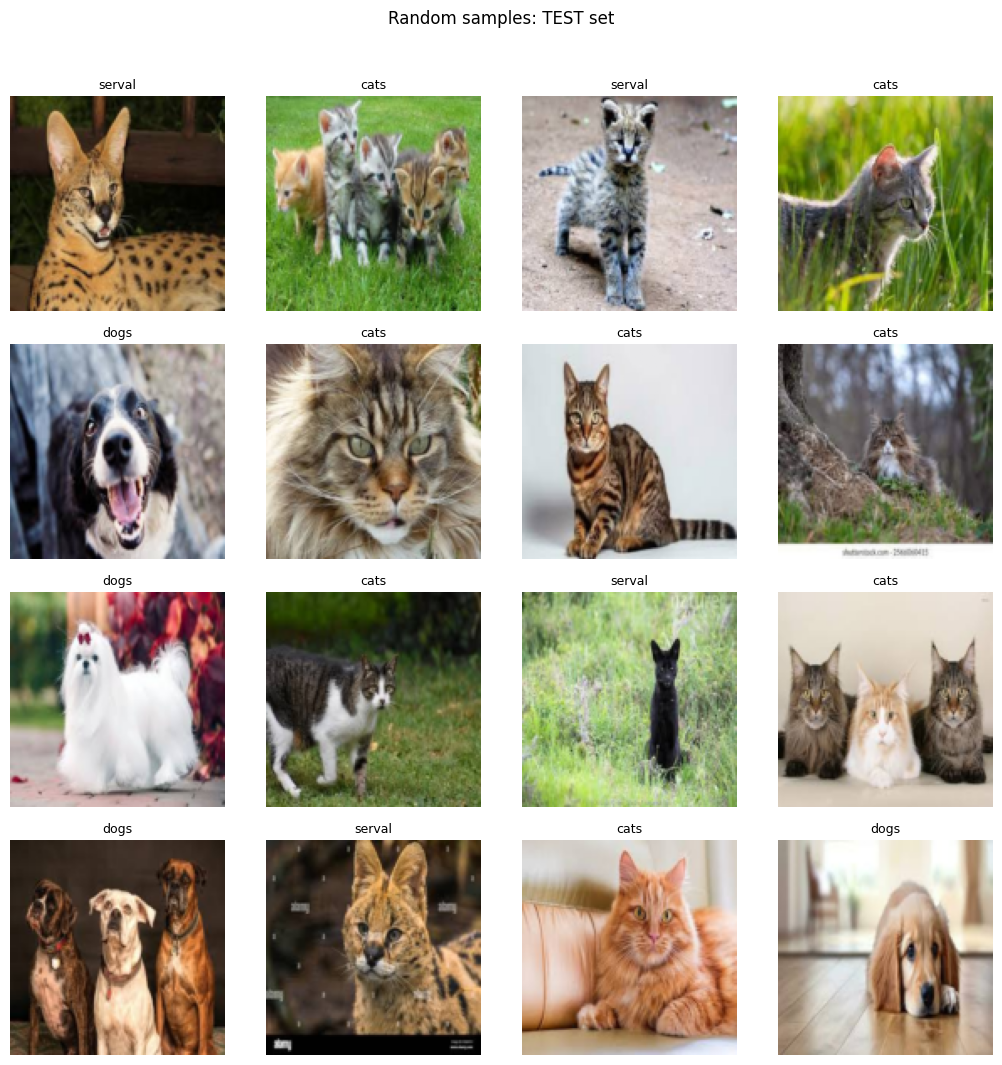

In [9]:
# -----------------------------
# Visualize images from the dataset (TRAIN / TEST)
# -----------------------------
import random, math
import matplotlib.pyplot as plt
import numpy as np
import torch

def _tensor_to_numpy_img(t: torch.Tensor):
    """Convert a CHW tensor to an HWC numpy image for plotting.
    If the tensor looks normalized (values outside [0,1]), it will be denormalized assuming mean=0.5, std=0.5.
    """
    img = t.detach().cpu()
    if img.ndim != 3:
        raise ValueError(f"Expected image tensor with shape [C,H,W], got {tuple(img.shape)}")
    # If normalized (common case: mean=0.5, std=0.5 => range [-1,1])
    if img.min() < 0 or img.max() > 1:
        if img.shape[0] in (1,3):
            mean = torch.tensor([0.5]*img.shape[0]).view(-1,1,1)
            std  = torch.tensor([0.5]*img.shape[0]).view(-1,1,1)
            img = img * std + mean
    img = img.clamp(0,1)
    img = img.permute(1,2,0).numpy()
    if img.shape[2] == 1:
        img = img[:,:,0]
    return img

def show_random_samples(dataset, class_names, n=16, title=""):
    n = min(n, len(dataset))
    idxs = random.sample(range(len(dataset)), n) if len(dataset) >= n else list(range(len(dataset)))
    cols = int(math.sqrt(n)) if n > 1 else 1
    rows = math.ceil(n / cols)
    plt.figure(figsize=(cols*2.6, rows*2.6))
    for i, idx in enumerate(idxs, start=1):
        img, label = dataset[idx]
        plt.subplot(rows, cols, i)
        plt.imshow(_tensor_to_numpy_img(img))
        plt.axis("off")
        plt.title(class_names[label], fontsize=9)
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

show_random_samples(train_dataset, class_names, n=16, title="Random samples: TRAIN set")
show_random_samples(test_dataset, class_names, n=16, title="Random samples: TEST set")

Visualizing batch: 16 images  (each shown as 128x128)


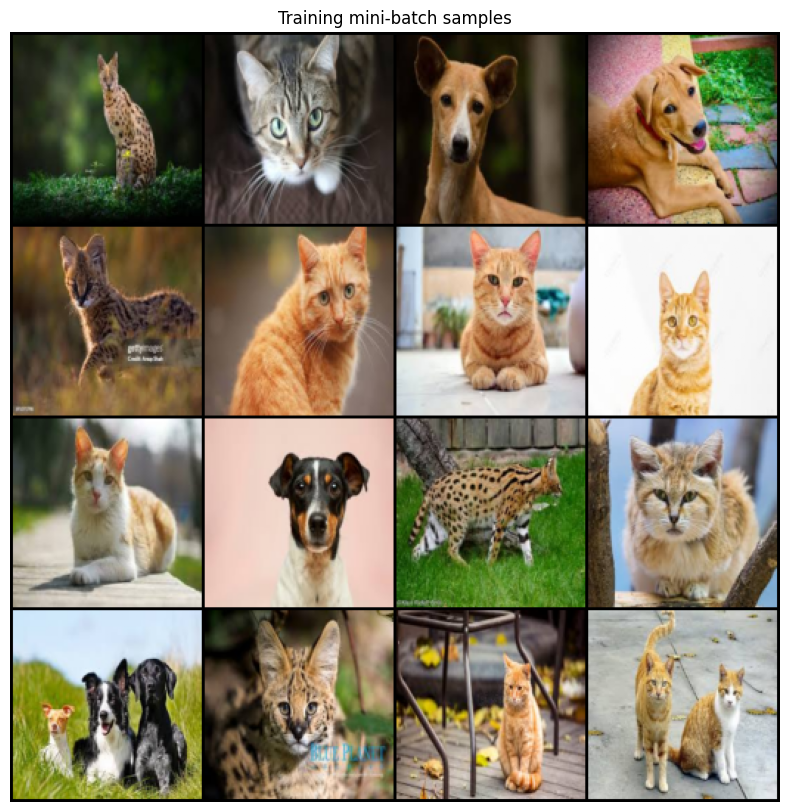

In [10]:
# -----------------------------
# Visualize a mini-batch from the training DataLoader
# (Robust to variable-size images)
# -----------------------------
import math
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.transforms import functional as TF

def _viz_collate(batch):
    # Return a list of tensors (C,H,W) + labels tensor, so we can handle variable image sizes.
    imgs, labs = zip(*batch)
    imgs_t = []
    for im in imgs:
        if isinstance(im, torch.Tensor):
            imgs_t.append(im)
        else:
            # If a dataset returns PIL images (transform=None), convert to tensor.
            imgs_t.append(TF.to_tensor(im))
    return list(imgs_t), torch.tensor(labs, dtype=torch.long)

viz_n = min(16, len(train_dataset))
viz_loader = DataLoader(train_dataset, batch_size=viz_n, shuffle=True, collate_fn=_viz_collate)

images, labels = next(iter(viz_loader))

# Choose a target size for grid display.
# If your pipeline already resizes in the dataset transform, you can set this to that same size.
TARGET_HW = (128, 128)

# If images are different sizes, resize just for visualization.
if len(images) > 1 and any(img.shape[-2:] != images[0].shape[-2:] for img in images):
    images = [
        F.interpolate(img.unsqueeze(0), size=TARGET_HW, mode="bilinear", align_corners=False).squeeze(0)
        for img in images
    ]

print(f"Visualizing batch: {len(images)} images  (each shown as {images[0].shape[-2]}x{images[0].shape[-1]})")

# make_grid(normalize=True) makes values displayable even if tensors are normalized
nrow = int(math.sqrt(viz_n)) if viz_n > 1 else 1
grid = make_grid(images, nrow=nrow, padding=2, normalize=True)

plt.figure(figsize=(10, 10))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.axis("off")
plt.title("Training mini-batch samples")
plt.show()


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os

# Select device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define dataset directories
data_dir = "MY_DATASET_EXP5"  # Change this to your dataset path
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Define transformations (Resize to prevent memory issues)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize for stability 0 and 1
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=False)

# Get number of classes
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 16 * 16, 256)  # Adjust size based on input image size
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten the feature maps
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize model
model = SimpleCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Using device: cuda
Number of classes: 3
Epoch [1/30], Loss: 1.1691, Accuracy: 38.71%
Epoch [2/30], Loss: 1.0963, Accuracy: 41.94%
Epoch [3/30], Loss: 1.0583, Accuracy: 54.84%
Epoch [4/30], Loss: 1.1008, Accuracy: 38.71%
Epoch [5/30], Loss: 0.9827, Accuracy: 48.39%
Epoch [6/30], Loss: 0.9403, Accuracy: 67.74%
Epoch [7/30], Loss: 0.7826, Accuracy: 80.65%
Epoch [8/30], Loss: 0.6335, Accuracy: 67.74%
Epoch [9/30], Loss: 0.9172, Accuracy: 70.97%
Epoch [10/30], Loss: 0.6614, Accuracy: 64.52%
Epoch [11/30], Loss: 0.6279, Accuracy: 70.97%
Epoch [12/30], Loss: 0.3493, Accuracy: 90.32%
Epoch [13/30], Loss: 0.3545, Accuracy: 77.42%
Epoch [14/30], Loss: 0.3991, Accuracy: 83.87%
Epoch [15/30], Loss: 0.4811, Accuracy: 87.10%
Epoch [16/30], Loss: 0.5080, Accuracy: 83.87%
Epoch [17/30], Loss: 0.3609, Accuracy: 87.10%
Epoch [18/30], Loss: 0.4017, Accuracy: 80.65%
Epoch [19/30], Loss: 0.2298, Accuracy: 83.87%
Epoch [20/30], Loss: 0.1082, Accuracy: 96.77%
Epoch [21/30], Loss: 0.2642, Accuracy: 87.10%
Epo

Using device: cuda
Classes: ['cats', 'dogs', 'serval']
Epoch [1/100], Loss: 1.2347, Accuracy: 29.03%
Epoch [2/100], Loss: 1.1671, Accuracy: 35.48%
Epoch [3/100], Loss: 0.9930, Accuracy: 54.84%
Epoch [4/100], Loss: 0.9779, Accuracy: 58.06%
Epoch [5/100], Loss: 0.9166, Accuracy: 61.29%
Epoch [6/100], Loss: 0.8169, Accuracy: 64.52%
Epoch [7/100], Loss: 0.6951, Accuracy: 80.65%
Epoch [8/100], Loss: 0.6744, Accuracy: 64.52%
Epoch [9/100], Loss: 0.5011, Accuracy: 80.65%
Epoch [10/100], Loss: 0.4883, Accuracy: 83.87%
Epoch [11/100], Loss: 0.3772, Accuracy: 87.10%
Epoch [12/100], Loss: 0.3305, Accuracy: 90.32%
Epoch [13/100], Loss: 0.1372, Accuracy: 96.77%
Epoch [14/100], Loss: 0.1571, Accuracy: 90.32%
Epoch [15/100], Loss: 0.2050, Accuracy: 93.55%
Epoch [16/100], Loss: 0.0995, Accuracy: 96.77%
Epoch [17/100], Loss: 0.0518, Accuracy: 100.00%
Epoch [18/100], Loss: 0.0205, Accuracy: 100.00%
Epoch [19/100], Loss: 0.0360, Accuracy: 100.00%
Epoch [20/100], Loss: 0.0188, Accuracy: 100.00%
Epoch [21/

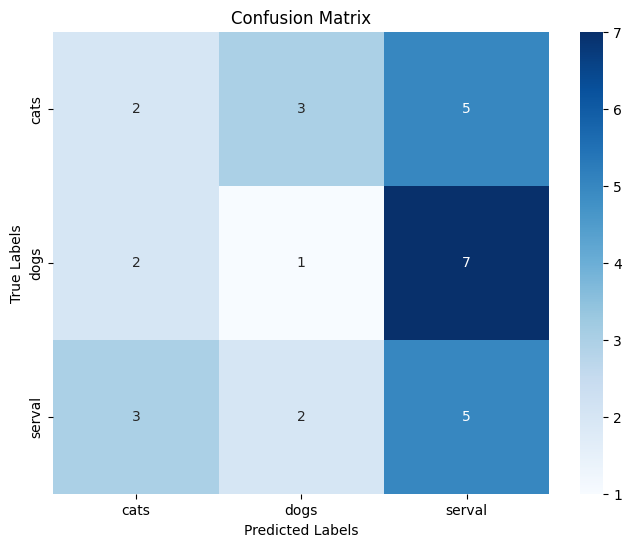


Classification Report:
               precision    recall  f1-score   support

        cats       0.29      0.20      0.24        10
        dogs       0.17      0.10      0.12        10
      serval       0.29      0.50      0.37        10

    accuracy                           0.27        30
   macro avg       0.25      0.27      0.24        30
weighted avg       0.25      0.27      0.24        30



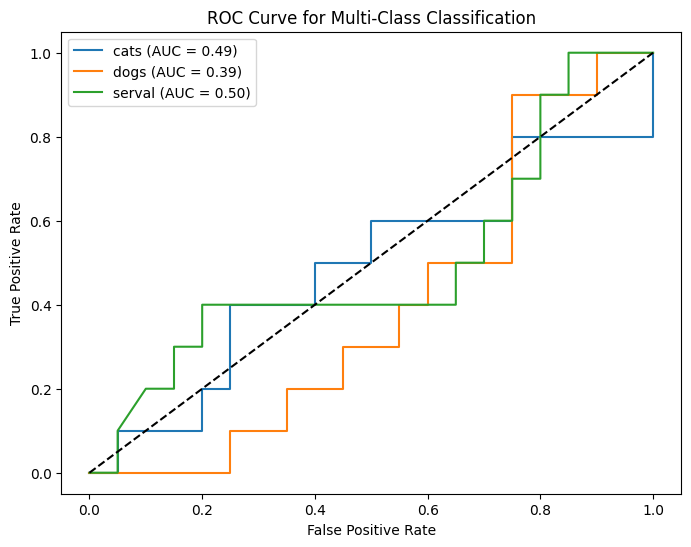

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Select device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define dataset directories
data_dir = "MY_DATASET_EXP5"  # Change this to your dataset path
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize for stability
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Get number of classes
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
print(f"Classes: {class_names}")

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten the feature maps
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize model
model = SimpleCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Testing loop
model.eval()
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities

        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

test_accuracy = 100 * (np.array(all_preds) == np.array(all_labels)).sum() / len(all_labels)
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=class_names))

# Convert labels to one-hot encoding for ROC curve (needed for multi-class classification)
all_labels_bin = label_binarize(all_labels, classes=list(range(num_classes)))
all_probs = np.array(all_probs)

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [13]:
# Display confusion matrix array (if already computed)
if "conf_matrix" in globals():
    conf_matrix
else:
    print("conf_matrix is not available yet. Run the training/evaluation cell to compute it.")

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)
from sklearn.preprocessing import label_binarize

# -----------------------------
# Setup
# -----------------------------
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset directories
data_dir = "MY_DATASET_EXP5"  # <-- change this if your folder name/path differs
train_dir = os.path.join(data_dir, "train")
test_dir  = os.path.join(data_dir, "test")

# Data augmentation (train) + standard preprocessing (test)
transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

transform_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

train_dataset = ImageFolder(root=train_dir, transform=transform_train)
test_dataset  = ImageFolder(root=test_dir,  transform=transform_test)

# NOTE: Keep batch size modest to avoid GPU/CPU RAM issues
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=2, shuffle=False)

num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
print(f"Classes ({num_classes}): {class_names}")

# -----------------------------
# CNN for 256x256 input
# -----------------------------
class CNN_256(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(128)
        self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)

        # 256x256 -> pool x3 => 32x32 with 128 channels
        self.fc1 = nn.Linear(128 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = CNN_256(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# -----------------------------
# Train with per-epoch logging (loss/accuracy on train + test)
# -----------------------------
train_losses, train_accs = [], []
test_losses,  test_accs  = [], []
lrs = []

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item() * labels.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    avg_loss = total_loss / max(1, total)
    acc = 100.0 * correct / max(1, total)
    return avg_loss, acc

num_epochs = 100  # adjust as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * labels.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / max(1, total)
    train_acc  = 100.0 * correct / max(1, total)

    test_loss, test_acc = evaluate(model, test_loader, criterion)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

    print(
        f"Epoch [{epoch+1:03d}/{num_epochs}] "
        f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% || "
        f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}% | LR: {lrs[-1]:.6f}"
    )

print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")

# -----------------------------
# Final test-set predictions (for confusion matrix, ROC/PR, sample visualizations)
# -----------------------------
model.eval()
all_labels = []
all_preds  = []
all_probs  = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)

        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_labels = np.array(all_labels)
all_preds  = np.array(all_preds)
all_probs  = np.array(all_probs)

conf_matrix = confusion_matrix(all_labels, all_preds)

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

Using device: cuda
Classes (3): ['cats', 'dogs', 'serval']
Epoch [001/100] Train Loss: 83.2086 | Train Acc: 41.94% || Test Loss: 88.5974 | Test Acc: 33.33% | LR: 0.001000
Epoch [002/100] Train Loss: 100.3629 | Train Acc: 35.48% || Test Loss: 57.1712 | Test Acc: 26.67% | LR: 0.001000
Epoch [003/100] Train Loss: 77.5041 | Train Acc: 38.71% || Test Loss: 35.3946 | Test Acc: 30.00% | LR: 0.001000
Epoch [004/100] Train Loss: 52.1138 | Train Acc: 51.61% || Test Loss: 48.2784 | Test Acc: 30.00% | LR: 0.001000
Epoch [005/100] Train Loss: 34.1116 | Train Acc: 51.61% || Test Loss: 28.1090 | Test Acc: 16.67% | LR: 0.001000
Epoch [006/100] Train Loss: 32.7157 | Train Acc: 41.94% || Test Loss: 29.2956 | Test Acc: 26.67% | LR: 0.000500
Epoch [007/100] Train Loss: 31.0881 | Train Acc: 45.16% || Test Loss: 25.0029 | Test Acc: 23.33% | LR: 0.000500
Epoch [008/100] Train Loss: 8.6596 | Train Acc: 70.97% || Test Loss: 28.5306 | Test Acc: 23.33% | LR: 0.000500
Epoch [009/100] Train Loss: 21.6614 | Train A

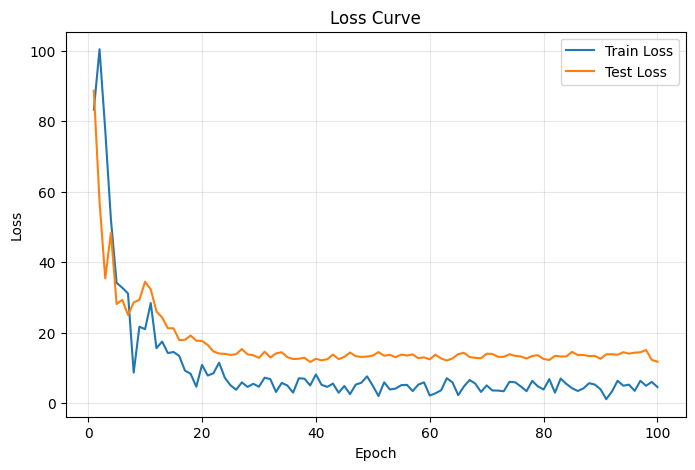

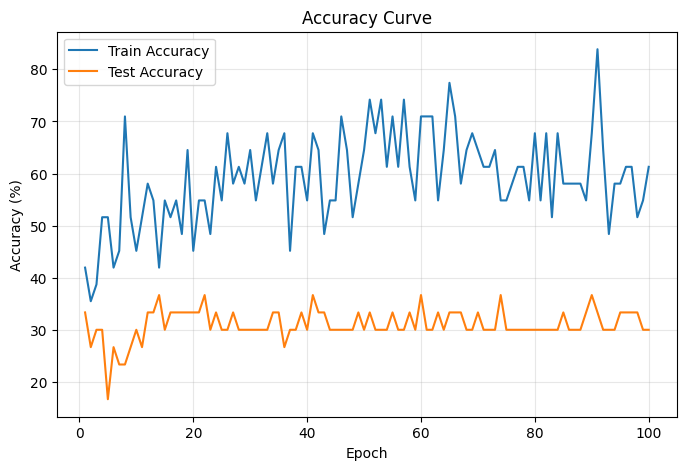

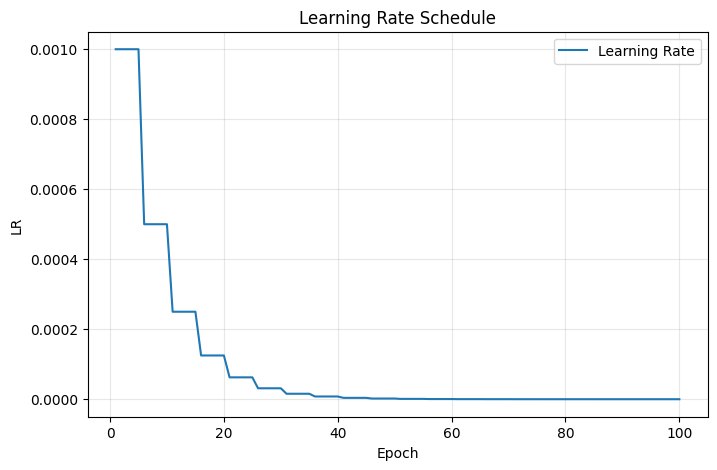

In [15]:
# -----------------------------
# Training vs Testing curves (Loss / Accuracy / LR)
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, len(train_losses) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accs, label="Train Accuracy")
plt.plot(epochs, test_accs, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, lrs, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("LR")
plt.title("Learning Rate Schedule")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

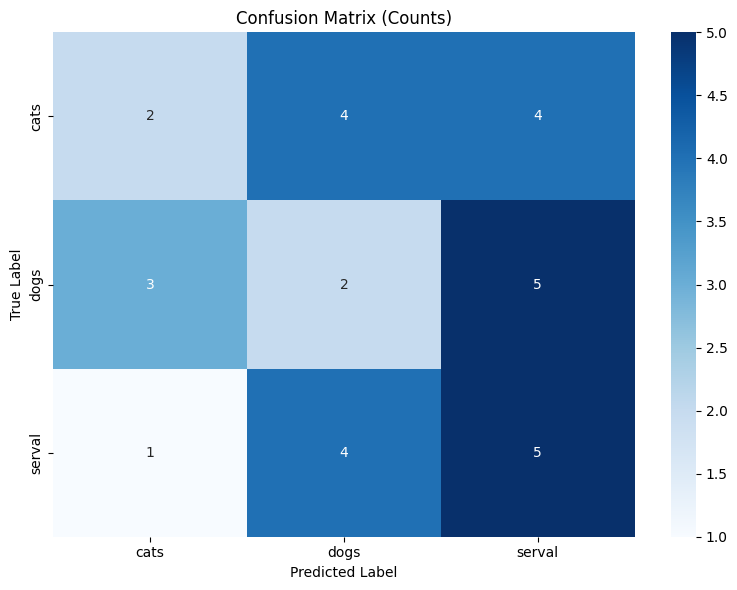

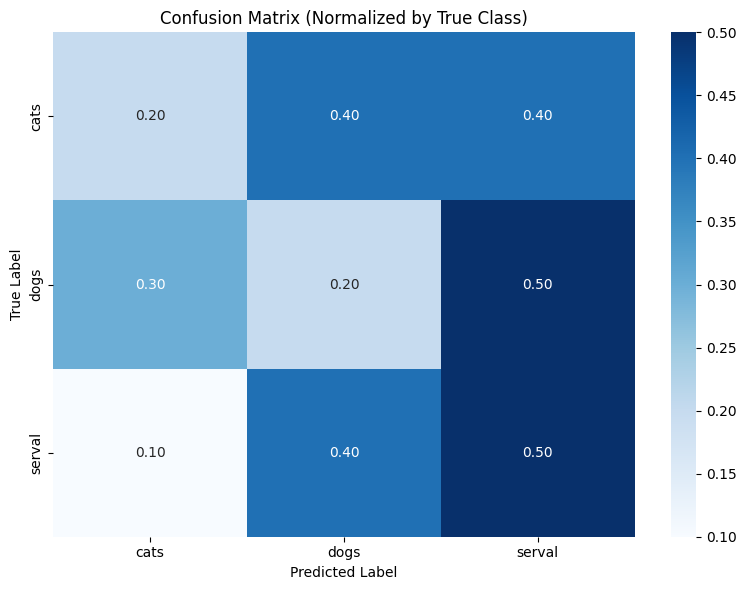

In [16]:
# -----------------------------
# Confusion Matrices (Counts + Normalized)
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Counts
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()

# Normalized (row-wise)
conf_norm = conf_matrix.astype(float) / np.maximum(conf_matrix.sum(axis=1, keepdims=True), 1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized by True Class)")
plt.tight_layout()
plt.show()

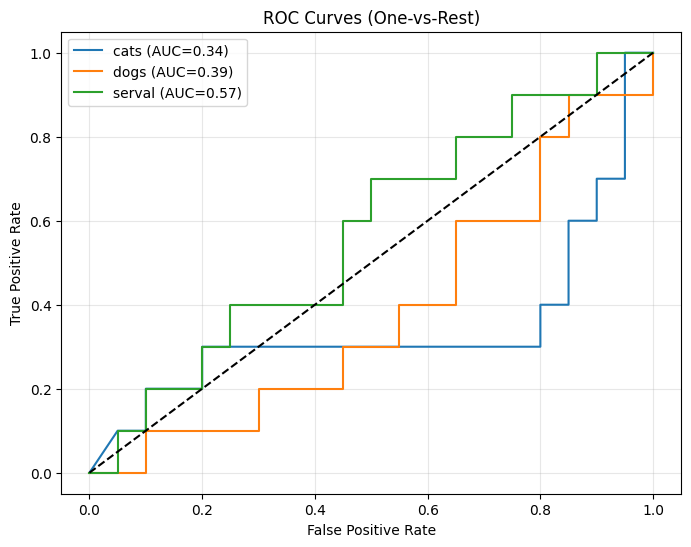

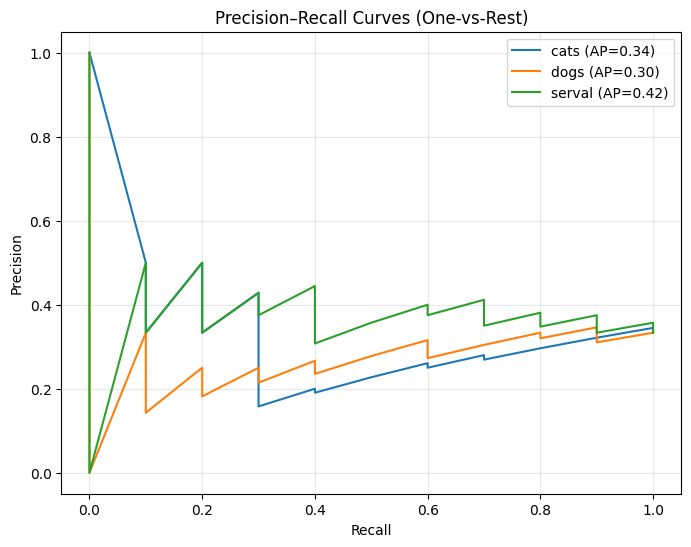

In [17]:
# -----------------------------
# Performance metric curves: ROC + Precision-Recall (multi-class)
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Binarize labels for multi-class ROC/PR
classes = list(range(num_classes))
y_true_bin = label_binarize(all_labels, classes=classes)

# label_binarize returns shape (n,1) for binary; convert to (n,2)
if num_classes == 2 and y_true_bin.shape[1] == 1:
    y_true_bin = np.hstack([1 - y_true_bin, y_true_bin])

# ROC curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Precision-Recall curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], all_probs[:, i])
    ap = average_precision_score(y_true_bin[:, i], all_probs[:, i])
    plt.plot(recall, precision, label=f"{class_names[i]} (AP={ap:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves (One-vs-Rest)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

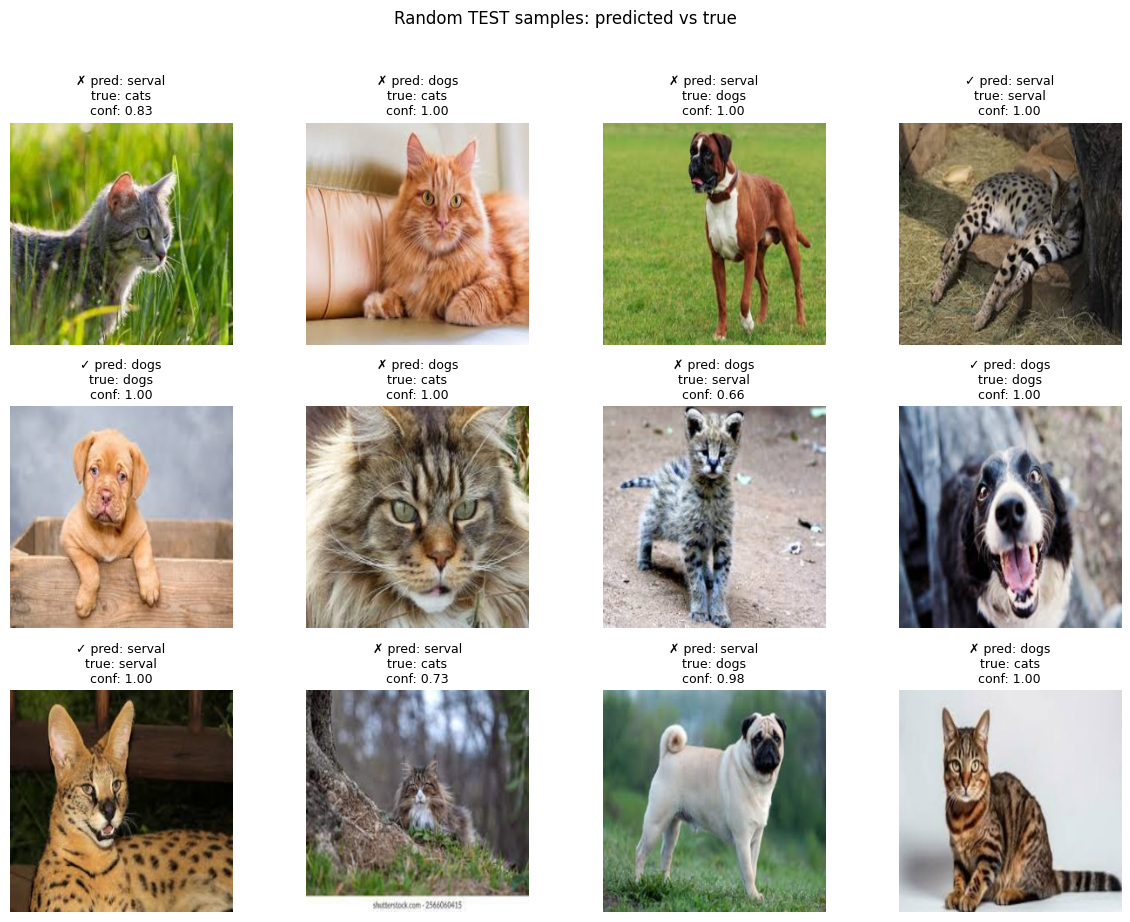

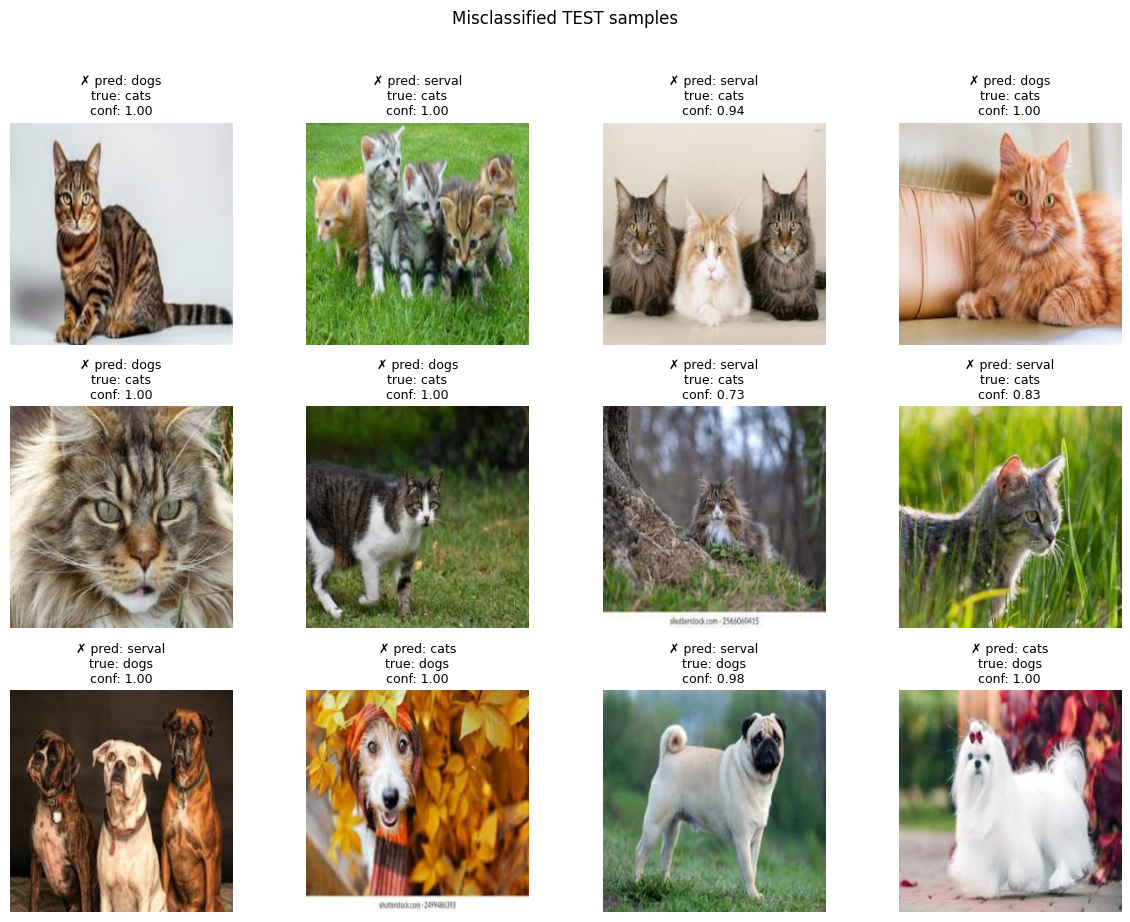

In [18]:
# -----------------------------
# Visualize test images with predicted + true labels
# -----------------------------
import random, math
import torch
import matplotlib.pyplot as plt
import numpy as np

def _tensor_to_numpy_img(t: torch.Tensor):
    img = t.detach().cpu()
    if img.min() < 0 or img.max() > 1:
        if img.shape[0] in (1, 3):
            mean = torch.tensor([0.5]*img.shape[0]).view(-1, 1, 1)
            std  = torch.tensor([0.5]*img.shape[0]).view(-1, 1, 1)
            img = img * std + mean
    img = img.clamp(0, 1)
    img = img.permute(1, 2, 0).numpy()
    if img.ndim == 3 and img.shape[2] == 1:
        img = img[:, :, 0]
    return img

@torch.no_grad()
def predict_indices(dataset, idxs, ncols=4, title=""):
    model.eval()
    imgs = torch.stack([dataset[i][0] for i in idxs]).to(device)
    true = [dataset[i][1] for i in idxs]

    logits = model(imgs)
    probs = torch.softmax(logits, dim=1)
    preds = probs.argmax(dim=1).cpu().tolist()
    confs = probs.max(dim=1).values.cpu().tolist()

    n = len(idxs)
    ncols = min(ncols, n) if n > 0 else ncols
    nrows = math.ceil(n / ncols) if n > 0 else 1

    plt.figure(figsize=(ncols * 3.0, nrows * 3.0))
    for j, (idx, y_true, y_pred, p) in enumerate(zip(idxs, true, preds, confs), start=1):
        img, _ = dataset[idx]
        plt.subplot(nrows, ncols, j)
        plt.imshow(_tensor_to_numpy_img(img))
        ok = (y_true == y_pred)
        mark = "✓" if ok else "✗"
        plt.title(f"{mark} pred: {class_names[y_pred]}\ntrue: {class_names[y_true]}\nconf: {p:.2f}", fontsize=9)
        plt.axis("off")

    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Random test samples
n_show = 12
idxs = random.sample(range(len(test_dataset)), min(n_show, len(test_dataset)))
predict_indices(test_dataset, idxs, ncols=4, title="Random TEST samples: predicted vs true")

# Misclassified examples (if any)
mis = np.where(all_preds != all_labels)[0]
if len(mis) > 0:
    idxs_mis = mis[:min(n_show, len(mis))].tolist()
    predict_indices(test_dataset, idxs_mis, ncols=4, title="Misclassified TEST samples")
else:
    print("No misclassifications found on the test set.")

In [19]:
from collections import Counter

# Check training dataset distribution
train_class_counts = Counter([label for _, label in train_dataset])
test_class_counts = Counter([label for _, label in test_dataset])

print("Training Class Distribution:", train_class_counts)
print("Testing Class Distribution:", test_class_counts)


Training Class Distribution: Counter({2: 11, 0: 10, 1: 10})
Testing Class Distribution: Counter({0: 10, 1: 10, 2: 10})
